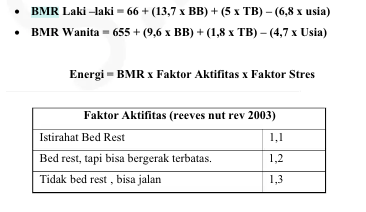

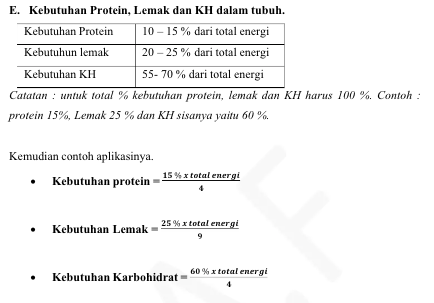

In [54]:
# tanpa batas BMR
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def nutrition_need(umur, tb, bb, aktifitas, kondisi):
    if aktifitas == "Bed Rest":
        aktifitas = 1.1
    elif aktifitas == "bergerak terbatas" :
        aktifitas = 1.2
    elif aktifitas == "bisa jalan" :
        aktifitas = 1.3
    else:
        return false
    # Calculate BMR and macronutrient needs
    BMR_perempuan = 655 + (9.6 * bb) + (1.8 * tb) - (4.7 * umur)
    total_kalori = BMR_perempuan * aktifitas
    karbohidrat = (0.6 * total_kalori) / 4
    lemak = (0.25 * total_kalori) / 9
    protein = (0.15 * total_kalori) / 4

    batas_atas = {
        'energi_kal' : total_kalori,
        'karbohidrat_gram': karbohidrat,
        'lemak_gram': lemak,
        'protein_gram': protein,
        'serat_gram': 0,
        'air_gram': 0,
        'vitc_mg': 0,
        'retinol_mcg': 0,
        'kalsium_mg': 0,
        'fosfor_mg': 0,
        'zatbesi_mg': 0,
        'kalium_mg': 0,
        'natrium_mg': 0,
        'tembaga_mg': 0
    }
    age_based_limits = [
        (11, 12, {'serat_gram': 27, 'air_gram': 1850, 'vitc_mg': 50, 'retinol_mcg': 600, 'kalsium_mg': 1200, 'fosfor_mg': 1250, 'zatbesi_mg': 8, 'kalium_mg': 4400, 'natrium_mg': 1400, 'tembaga_mg': 700}),
        (13, 15, {'serat_gram': 27, 'air_gram': 2100, 'vitc_mg': 65, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 1250, 'zatbesi_mg': 15, 'kalium_mg': 4800, 'natrium_mg': 1500, 'tembaga_mg': 795}),
        (16, 18, {'serat_gram': 29, 'air_gram': 2150, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 1250, 'zatbesi_mg': 15, 'kalium_mg': 5000, 'natrium_mg': 1600, 'tembaga_mg': 890}),
        (19, 29, {'serat_gram': 32, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1000, 'fosfor_mg': 700, 'zatbesi_mg': 18, 'kalium_mg': 4700, 'natrium_mg': 1500, 'tembaga_mg': 900}),
        (30, 49, {'serat_gram': 30, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1000, 'fosfor_mg': 700, 'zatbesi_mg': 18, 'kalium_mg': 4700, 'natrium_mg': 1500, 'tembaga_mg': 900}),
        (50, 64, {'serat_gram': 25, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 700, 'zatbesi_mg': 8, 'kalium_mg': 4700, 'natrium_mg': 1400, 'tembaga_mg': 900}),
        (65, 80, {'serat_gram': 22, 'air_gram': 1550, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 700, 'zatbesi_mg': 8, 'kalium_mg': 4700, 'natrium_mg': 1200, 'tembaga_mg': 900}),
        (80, float('inf'), {'serat_gram': 20, 'air_gram': 1400, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 700, 'zatbesi_mg': 8, 'kalium_mg': 4700, 'natrium_mg': 1000, 'tembaga_mg': 900})
    ]
    for min_age, max_age, limits in age_based_limits:
        if min_age <= umur <= max_age:
            batas_atas.update(limits)
            break
    kondisi_based_adjustments = {
        'hamil_trim_1': {'energi_kal':180,'karbohidrat_gram':25,'lemak_gram':2.3,'protein_gram':1, 'serat_gram': 3, 'air_gram': 300, 'vitc_mg': 10, 'retinol_mcg': 300, 'kalsium_mg': 200, 'tembaga_mg': 100},
        'hamil_trim_2': {'energi_kal':300,'karbohidrat_gram':40,'lemak_gram':2.3,'protein_gram':10,'serat_gram': 4, 'air_gram': 300, 'vitc_mg': 10, 'retinol_mcg': 300,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'tembaga_mg': 100},
        'hamil_trim_3': {'energi_kal':300,'karbohidrat_gram':40,'lemak_gram':2.3,'protein_gram':30,'serat_gram': 4, 'air_gram': 300, 'vitc_mg': 10, 'retinol_mcg': 300,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'tembaga_mg': 100},
        'menyusui_6_awal': {'energi_kal':330,'karbohidrat_gram':45,'lemak_gram':2.2,'protein_gram':20,'serat_gram': 5, 'air_gram': 800, 'vitc_mg': 45, 'retinol_mcg': 350,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'kalium_mg': 400, 'tembaga_mg': 100},
        'menyusui_6_kedua': {'energi_kal':400,'karbohidrat_gram':55,'lemak_gram':2.2,'protein_gram':15,'serat_gram': 5, 'air_gram': 650, 'vitc_mg': 45, 'retinol_mcg': 350,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'kalium_mg': 400, 'tembaga_mg': 100}
    }
    if kondisi in kondisi_based_adjustments:
        for key, value in kondisi_based_adjustments[kondisi].items():
            batas_atas[key] += value
    return batas_atas


def preprocess_data(filepath):
    # Baca data dari CSV
    data = pd.read_csv(filepath)

    # Drop kolom yang tidak diperlukan
    # Kolom tetap digunakan pada saat pembuatan API
    data = data.drop(['id', 'kode', 'sumber', 'gambar', 'satuan'], axis=1)

    # Ubah nilai yang asalnya ',' menjadi '.'
    numeric_cols = ['air_gram', 'energi_kal', 'protein_gram', 'lemak_gram', 'karbohidrat_gram', 'serat_gram',
                    'kalsium_mg', 'fosfor_mg', 'zatbesi_mg', 'natrium_mg', 'kalium_mg', 'tembaga_mg', 'vitc_mg']

    data[numeric_cols] = data[numeric_cols].replace({',': '.'}, regex=True).astype(float)

    return data, numeric_cols

def scaling(data, numeric_cols):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data[numeric_cols])
    return data_normalized, scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine', algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh, params):
    transformer = FunctionTransformer(neigh.kneighbors, kw_args=params)
    pipeline = Pipeline([('NN', transformer)])
    return pipeline

def extract_data(data, allergy_list):
    filtered_data = data.copy()
    if allergy_list is not None:
        for allergy in allergy_list:
            filtered_data = filtered_data[~filtered_data['nama_bahan'].str.contains(allergy, case=False, na=False)]
            filtered_data = filtered_data[~filtered_data['jenis_pangan'].str.contains(allergy, case=False, na=False)]
    return filtered_data

def apply_pipeline(pipeline, food_indices, extracted_data):
    return extracted_data.iloc[pipeline.transform(food_indices)[0]]

def recommend(data, food_names, numeric_cols, allergy_list=None, params={'n_neighbors': 10, 'return_distance': True}):
    extracted_data = extract_data(data, allergy_list)
    data_normalized, scaler = scaling(extracted_data, numeric_cols)
    neigh = nn_predictor(data_normalized)
    pipeline = build_pipeline(neigh, params)
    
    # Cari indeks makanan yang cocok dengan nama makanan yang diberikan
    food_indices = [data[data['nama_bahan'] == food_name].index[0] for food_name in food_names]
    
    distances, recommended_indices = pipeline.transform(data_normalized[food_indices])
    recommended_foods = extracted_data.iloc[recommended_indices[0]]['nama_bahan'].tolist()
    
    return recommended_foods, distances[0]


# Contoh penggunaan
filepath = "makanan8.csv"
allergy_list = ['susu']  # Ganti dengan alergi yang dimiliki user
food_names = ['tempe pasar goreng']  # Ganti dengan makanan yang dimiliki user

data, numeric_cols = preprocess_data(filepath)
recommendations, distances = recommend(data, food_names, numeric_cols, allergy_list)

print("Rekomendasi makanan:")
for idx, (food, score) in enumerate(zip(recommendations, distances)):
    print(f"{idx+1}. {food} (Distance Score: {score})")


Rekomendasi makanan:
1. tepung kentang kering (Distance Score: 0.0)
2. Gula putih (Distance Score: 0.003715631345909909)
3. sagu singkong kering (Distance Score: 0.0048106586421672315)
4. tepung arrowroot (Distance Score: 0.005069637367245194)
5. kue bangket (Distance Score: 0.005745204882046773)
6. Madu (Distance Score: 0.010704389422261706)
7. gadeng gadung kering (Distance Score: 0.012046793289218649)
8. tepung ganyong (Distance Score: 0.013369026420687158)
9. bihun mentah (Distance Score: 0.0138850995655585)
10. kue koa (Distance Score: 0.014501881673939732)


In [39]:
#euclidean
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def preprocess_data(filepath):
    # Baca data dari CSV
    data = pd.read_csv(filepath)

    # Drop kolom yang tidak diperlukan
    data = data.drop(['id', 'kode', 'sumber', 'gambar'], axis=1)

    # Ubah nilai yang asalnya ',' menjadi '.'
    numeric_cols = ['air_gram', 'energi_kal', 'protein_gram', 'lemak_gram', 'karbohidrat_gram', 'serat_gram',
                    'kalsium_mg', 'fosfor_mg', 'zatbesi_mg', 'natrium_mg', 'kalium_mg', 'tembaga_mg', 'vitc_mg']

    data[numeric_cols] = data[numeric_cols].replace({',': '.'}, regex=True)

    return data, numeric_cols

def scaling(data, numeric_cols):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data[numeric_cols])
    return data_normalized, scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='euclidean', algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh, params):
    transformer = FunctionTransformer(neigh.kneighbors, kw_args=params)
    pipeline = Pipeline([('NN', transformer)])
    return pipeline

def extract_data(data, allergy_list):
    filtered_data = data.copy()
    if allergy_list is not None:
        for allergy in allergy_list:
            filtered_data = filtered_data[~filtered_data['nama_bahan'].str.contains(allergy, case=False)]
            filtered_data = filtered_data[~filtered_data['jenis_pangan'].str.contains(allergy, case=False)]
    return filtered_data

def apply_pipeline(pipeline, food_indices, extracted_data):
    return extracted_data.iloc[pipeline.transform(food_indices)[0]]

def recommend(data, food_names, numeric_cols, allergy_list=None, params={'n_neighbors': 11, 'return_distance': True}):
    extracted_data = extract_data(data, allergy_list)
    data_normalized, scaler = scaling(extracted_data, numeric_cols)
    neigh = nn_predictor(data_normalized)
    pipeline = build_pipeline(neigh, params)
    
    # Cari indeks makanan yang cocok dengan nama makanan yang diberikan
    food_indices = [data[data['nama_bahan'] == food_name].index[0] for food_name in food_names]
    
    distances, recommended_indices = pipeline.transform(data_normalized[food_indices])
    recommended_foods = extracted_data.iloc[recommended_indices[0]]['nama_bahan'].tolist()
    
    return recommended_foods, distances[0]


# Contoh penggunaan
filepath = "makanan8.csv"
allergy_list = ['susu']  # Ganti dengan alergi yang dimiliki user
food_names = ['nasi']  # Ganti dengan makanan yang dimiliki user

data, numeric_cols = preprocess_data(filepath)
recommendations, distances = recommend(data, food_names, numeric_cols, allergy_list)

print("Rekomendasi makanan:")
for idx, (food, score) in enumerate(zip(recommendations, distances)):
    print(f"{idx+1}. {food} (Distance Score: {score})")


Rekomendasi makanan:
1. nasi gurih (Distance Score: 0.0)
2. nasi gemuk (Distance Score: 0.1938821525688042)
3. pempek telur masakan (Distance Score: 0.5527974682349015)
4. martabak india (Distance Score: 0.5637870940075181)
5. pempek adaan masakan (Distance Score: 0.6230513774688108)
6. cangkuning (Distance Score: 0.7412564973267222)
7. beef teriyaki masakan (Distance Score: 0.761184141669089)
8. nasi minyak (Distance Score: 0.7666180622019597)
9. semur jengkol (Distance Score: 0.7753791138809322)
10. padamaran (Distance Score: 0.7911285744675874)
11. uli batatas (Distance Score: 0.8109429697778041)


In [50]:
#cbf biasa
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Baca data dari CSV
data = pd.read_csv("makanan8.csv")

# Drop kolom yang tidak diperlukan
data = data.drop(['id', 'kode', 'sumber', 'gambar', 'satuan'], axis=1)

# Ubah nilai yang asalnya ',' menjadi '.'
numeric_cols = ['air_gram', 'energi_kal', 'protein_gram', 'lemak_gram', 'karbohidrat_gram', 'serat_gram',
                'kalsium_mg', 'fosfor_mg', 'zatbesi_mg', 'natrium_mg', 'kalium_mg', 'tembaga_mg', 'vitc_mg']

data[numeric_cols] = data[numeric_cols].replace({',': '.'}, regex=True)

# Normalisasi data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[numeric_cols])

# Hitung similarity matrix (Cosine Similarity)
cosine_sim = cosine_similarity(data_normalized, data_normalized)


# Fungsi untuk mendapatkan rekomendasi makanan
def get_recommendations(food_names, allergy_list):
    # Cari indeks makanan yang cocok dengan nama makanan yang diberikan
    food_indices = [data[data['nama_bahan'] == food_name].index[0] for food_name in food_names]
    
    print("Makanan tersebut berada di indeks ke-", food_indices)
    
    # Filter makanan berdasarkan alergi
    filtered_data = data.copy()
    for allergy in allergy_list:
        filtered_data = filtered_data[~filtered_data['nama_bahan'].str.contains(allergy, case=False)]
        filtered_data = filtered_data[~filtered_data['jenis_pangan'].str.contains(allergy, case=False)]
    
    # Hitung similarity antara makanan yang dimiliki user dengan makanan yang tersedia
    sim_scores = []
    for food_index in food_indices:
        sim_scores.extend(list(enumerate(cosine_sim[food_index])))
    
    # Hitung rata-rata similarity score untuk setiap makanan yang tersedia
    sim_scores_df = pd.DataFrame(sim_scores, columns=['index', 'score'])
    avg_sim_scores = sim_scores_df.groupby('index')['score'].mean().reset_index()
    
    # Urutkan makanan berdasarkan similarity score
    avg_sim_scores = avg_sim_scores.sort_values(by='score', ascending=False)
    
    
    # Ambil 10 makanan dengan similarity score tertinggi (kecuali makanan yang dimiliki user)
    top_similar_food_indices = avg_sim_scores['index'].iloc[0:11].tolist()  # [1:11] karena urutan 0 adalah makanan itu sendiri
    top_similar_food_names = data['nama_bahan'].iloc[top_similar_food_indices].tolist()
    top_similar_food_scores = avg_sim_scores['score'].iloc[1:11].tolist()  # Nilai similarity
    
    return top_similar_food_names, top_similar_food_scores

# Contoh penggunaan
allergy_list = ['susu']  # Ganti dengan alergi yang dimiliki user
food_names = ['tahu goreng']  # Ganti dengan makanan yang dimiliki user
recommendations, similarity_scores = get_recommendations(food_names, allergy_list)
print("Rekomendasi makanan:")
for idx, (food, score) in enumerate(zip(recommendations, similarity_scores)):
    print(f"{idx+1}. {food} (Similarity Score: {score})")


Makanan tersebut berada di indeks ke- [1000]
Rekomendasi makanan:
1. tahu goreng (Similarity Score: 0.970086369926993)
2. tahu telur (Similarity Score: 0.9246851728738472)
3. telur burung puyuh segar (Similarity Score: 0.9203137136853085)
4. rujak cingur (Similarity Score: 0.9082269873500937)
5. rawon masakan (Similarity Score: 0.8967658480904392)
6. soto madura masakan (Similarity Score: 0.8925546309969429)
7. soto sulung masakan (Similarity Score: 0.874485448537578)
8. telur ayam ras bagian kuning segar (Similarity Score: 0.8595725740692691)
9. ikan hiu segar (Similarity Score: 0.8525209970809668)
10. ikan sidat segar (Similarity Score: 0.8432828395359192)


In [56]:
#knn cbf + filter by bmr
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def nutrition_need(umur, tb, bb, aktifitas, kondisi):
    if aktifitas == "Bed Rest":
        aktifitas = 1.1
    elif aktifitas == "bergerak terbatas" :
        aktifitas = 1.2
    elif aktifitas == "bisa jalan" :
        aktifitas = 1.3
    else:
        return False

    # Calculate BMR and macronutrient needs
    BMR_perempuan = 655 + (9.6 * bb) + (1.8 * tb) - (4.7 * umur)
    total_kalori = BMR_perempuan * aktifitas
    karbohidrat = (0.6 * total_kalori) / 4
    lemak = (0.25 * total_kalori) / 9
    protein = (0.15 * total_kalori) / 4

    batas_atas = {
        'energi_kal' : total_kalori,
        'karbohidrat_gram': karbohidrat,
        'lemak_gram': lemak,
        'protein_gram': protein,
        'serat_gram': 0,
        'air_gram': 0,
        'vitc_mg': 0,
        'retinol_mcg': 0,
        'kalsium_mg': 0,
        'fosfor_mg': 0,
        'zatbesi_mg': 0,
        'kalium_mg': 0,
        'natrium_mg': 0,
        'tembaga_mg': 0
    }

    age_based_limits = [
        (11, 12, {'serat_gram': 27, 'air_gram': 1850, 'vitc_mg': 50, 'retinol_mcg': 600, 'kalsium_mg': 1200, 'fosfor_mg': 1250, 'zatbesi_mg': 8, 'kalium_mg': 4400, 'natrium_mg': 1400, 'tembaga_mg': 700}),
        (13, 15, {'serat_gram': 27, 'air_gram': 2100, 'vitc_mg': 65, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 1250, 'zatbesi_mg': 15, 'kalium_mg': 4800, 'natrium_mg': 1500, 'tembaga_mg': 795}),
        (16, 18, {'serat_gram': 29, 'air_gram': 2150, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 1250, 'zatbesi_mg': 15, 'kalium_mg': 5000, 'natrium_mg': 1600, 'tembaga_mg': 890}),
        (19, 29, {'serat_gram': 32, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1000, 'fosfor_mg': 700, 'zatbesi_mg': 18, 'kalium_mg': 4700, 'natrium_mg': 1500, 'tembaga_mg': 900}),
        (30, 49, {'serat_gram': 30, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1000, 'fosfor_mg': 700, 'zatbesi_mg': 18, 'kalium_mg': 4700, 'natrium_mg': 1500, 'tembaga_mg': 900}),
        (50, 64, {'serat_gram': 25, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 700, 'zatbesi_mg': 8, 'kalium_mg': 4700, 'natrium_mg': 1400, 'tembaga_mg': 900}),
        (65, 80, {'serat_gram': 22, 'air_gram': 1550, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 700, 'zatbesi_mg': 8, 'kalium_mg': 4700, 'natrium_mg': 1200, 'tembaga_mg': 900}),
        (80, float('inf'), {'serat_gram': 20, 'air_gram': 1400, 'vitc_mg': 75, 'retinol_mcg': 600,'kalsium_mg': 1200, 'fosfor_mg': 700, 'zatbesi_mg': 8, 'kalium_mg': 4700, 'natrium_mg': 1000, 'tembaga_mg': 900})
    ]

    for min_age, max_age, limits in age_based_limits:
        if min_age <= umur <= max_age:
            batas_atas.update(limits)
            break

    kondisi_based_adjustments = {
        'hamil_trim_1': {'energi_kal':180,'karbohidrat_gram':25,'lemak_gram':2.3,'protein_gram':1, 'serat_gram': 3, 'air_gram': 300, 'vitc_mg': 10, 'retinol_mcg': 300, 'kalsium_mg': 200, 'tembaga_mg': 100},
        'hamil_trim_2': {'energi_kal':300,'karbohidrat_gram':40,'lemak_gram':2.3,'protein_gram':10,'serat_gram': 4, 'air_gram': 300, 'vitc_mg': 10, 'retinol_mcg': 300,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'tembaga_mg': 100},
        'hamil_trim_3': {'energi_kal':300,'karbohidrat_gram':40,'lemak_gram':2.3,'protein_gram':30,'serat_gram': 4, 'air_gram': 300, 'vitc_mg': 10, 'retinol_mcg': 300,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'tembaga_mg': 100},
        'menyusui_6_awal': {'energi_kal':330,'karbohidrat_gram':45,'lemak_gram':2.2,'protein_gram':20,'serat_gram': 5, 'air_gram': 800, 'vitc_mg': 45, 'retinol_mcg': 350,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'kalium_mg': 400, 'tembaga_mg': 100},
        'menyusui_6_kedua': {'energi_kal':400,'karbohidrat_gram':55,'lemak_gram':2.2,'protein_gram':15,'serat_gram': 5, 'air_gram': 650, 'vitc_mg': 45, 'retinol_mcg': 350,  'kalsium_mg': 200, 'zatbesi_mg': 9, 'kalium_mg': 400, 'tembaga_mg': 100}
    }

    if kondisi in kondisi_based_adjustments:
        for key, value in kondisi_based_adjustments[kondisi].items():
            batas_atas[key] += value

    print(batas_atas)
    return batas_atas


def preprocess_data(filepath):
    # Baca data dari CSV
    data = pd.read_csv(filepath)

    # Drop kolom yang tidak diperlukan
    data = data.drop(['id', 'kode', 'sumber', 'gambar', 'satuan'], axis=1)
    # Ubah nilai yang asalnya ',' menjadi '.' dan ubah ke tipe float
    numeric_cols = [
    "air_gram",
    "energi_kal",
    "protein_gram",
    "lemak_gram",
    "karbohidrat_gram",
    "serat_gram",
    "abu_gram",
    "kalsium_mg",
    "fosfor_mg",
    "zatbesi_mg",
    "natrium_mg",
    "kalium_mg",
    "tembaga_mg",
    "seng_mg",
    "retinol_mcg",
    "bkaroten_mcg",
    "karotentotal_mcg",
    "thiamin_mg",
    "riboflavin_mg",
    "niasin_mg",
    "vitc_mg"
]
    data[numeric_cols] = data[numeric_cols].replace({',': '.'}, regex=True).astype(float)

    return data, numeric_cols


def scaling(data, numeric_cols):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data[numeric_cols])
    return data_normalized, scaler


def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine', algorithm='brute')
    neigh.fit(prep_data)
    return neigh


def build_pipeline(neigh, params):
    transformer = FunctionTransformer(neigh.kneighbors, kw_args=params)
    pipeline = Pipeline([('NN', transformer)])
    return pipeline


def extract_data(data, allergy_list):
    filtered_data = data.copy()
    if allergy_list is not None:
        for allergy in allergy_list:
            filtered_data = filtered_data[~filtered_data['nama_bahan'].str.contains(allergy, case=False, na=False)]
            filtered_data = filtered_data[~filtered_data['jenis_pangan'].str.contains(allergy, case=False, na=False)]
    return filtered_data


def apply_pipeline(pipeline, food_indices, extracted_data):
    return extracted_data.iloc[pipeline.transform(food_indices)[0]]


def recommend(data, umur, tb, bb, aktifitas, kondisi, food_names, allergy_list=None, params={'n_neighbors': 20, 'return_distance': True}):
    batas_atas = nutrition_need(umur, tb, bb, aktifitas, kondisi)
    
    # Identifikasi makanan yang melebihi batas atas natrium_mg dan retinol_mcg
    filtered_data = extract_data(data, allergy_list)
    exceeded_nutrients = filtered_data[(filtered_data['natrium_mg'] > 500) | (filtered_data['retinol_mcg'] > 770)]
    foods_to_reduce = exceeded_nutrients['nama_bahan'].tolist()
    print(f"Makanan yang harus dikurangi karena melebihi batas atas: {foods_to_reduce}")

    # Normalisasi data
    data_normalized, scaler = scaling(filtered_data, numeric_cols)

    # Inisialisasi Nearest Neighbors
    neigh = nn_predictor(data_normalized)
    
    # Bangun pipeline
    pipeline = build_pipeline(neigh, params)
    
    # Cari indeks makanan yang cocok dengan nama makanan yang diberikan
    food_indices = [filtered_data[filtered_data['nama_bahan'] == food_name].index[0] for food_name in food_names]
    
    # Prediksi rekomendasi makanan
    distances, recommended_indices = pipeline.transform(data_normalized[food_indices])
    recommended_foods = filtered_data.iloc[recommended_indices[0]]['nama_bahan'].tolist()
    
    return recommended_foods, distances[0]


# Contoh penggunaan
filepath = "makanan8.csv"
umur = 25
tb = 160
bb = 55
aktifitas = "bisa jalan"
kondisi = "normal"
allergy_list = ['susu']  # Ganti dengan alergi yang dimiliki user
food_names = ['tempe pasar']  # Ganti dengan makanan yang dimiliki user

data, numeric_cols = preprocess_data(filepath)
recommendations, distances = recommend(data, umur, tb, bb, aktifitas, kondisi, food_names, allergy_list)

print("Rekomendasi makanan:")
for idx, (food, score) in enumerate(zip(recommendations, distances)):
    print(f"{idx+1}. {food} (Distance Score: {score})")


{'energi_kal': 1759.55, 'karbohidrat_gram': 263.9325, 'lemak_gram': 48.87638888888889, 'protein_gram': 65.983125, 'serat_gram': 32, 'air_gram': 2350, 'vitc_mg': 75, 'retinol_mcg': 600, 'kalsium_mg': 1000, 'fosfor_mg': 700, 'zatbesi_mg': 18, 'kalium_mg': 4700, 'natrium_mg': 1500, 'tembaga_mg': 900}
Makanan yang harus dikurangi karena melebihi batas atas: ['ares sayur', 'ayam ampela goreng', 'ayam daging segar', 'ayam dideh darah segar', 'ayam goreng church texas dada', 'ayam goreng mbok berek dada', 'ayam goreng pasundan dada', 'ayam goreng pasundan paha', 'ayam goreng sukabumi dada', 'ayam taliwang masakan', 'babi daging gemuk segar', 'babi hutan masak rica masakan', 'bayau mi balu masakan', 'beef burger', 'Bekasam', 'Bekasang', 'bihun goreng instan', 'bulgogi masakan', 'chicken teriyaki masakan', 'chikiniku masakan', 'empal (daging) goreng masakan', 'gulai ikan masakan', 'gulai ikan paya masakan', 'ikan cakalang asap mentah', 'ikan cakalang asin mentah', 'ikan cakalang hati segar', 'i